### Importing the libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [58]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

### Visualising items' frequencies

<Axes: >

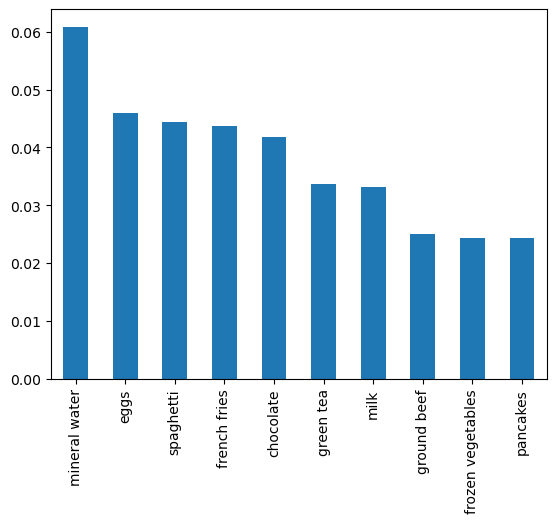

In [57]:
df.stack().value_counts(normalize=True)[:10].plot(kind='bar') # Relative frequency

<Axes: >

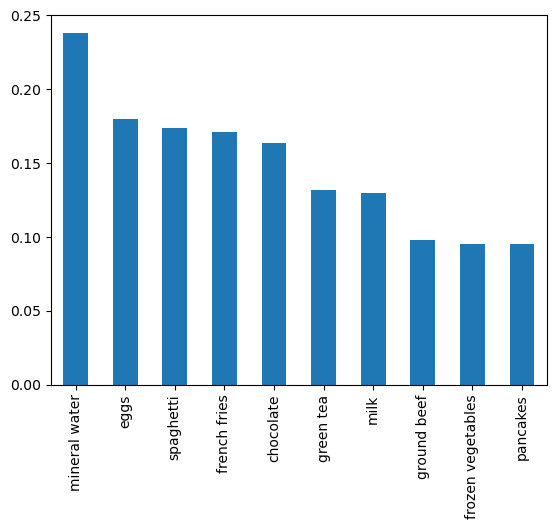

In [59]:
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar') # Frequency

### Formatting the dataset

In [48]:
transactions = []
for i in range(dataset.shape[0]):
    row = dataset.iloc[i].dropna().tolist()
    transactions.append(row)

### Building the model

In [49]:
import sys
from apyori import apriori
rules = apriori(transactions=transactions, 
                min_support=0.004, # how frequent is your item(s) in the dataset 
                min_confidence=0.2, # how often your rule will work
                min_lift=3, # how better off you are compared to pure randomness
                min_length=0, 
                max_length=2)
results = list(rules)

### Organizing the model's output

In [50]:
def inspect(results):
    item_sets = []
    supports = [] 
    lhs = []
    rhs = []
    confidences = []
    lifts = []
    for result in results:
        for subset in result[2]:
            item_sets.append(tuple(result[0]))
            supports.append(result[1])
            lhs.append(tuple(subset[0]))
            rhs.append(tuple(subset[1]))
            confidences.append(subset[2])
            lifts.append(subset[3])
    return list(zip(item_sets, lhs, rhs, supports, confidences, lifts))

results_df = pd.DataFrame(inspect(results),
                          columns = ['Item Set', 'Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

<Axes: >

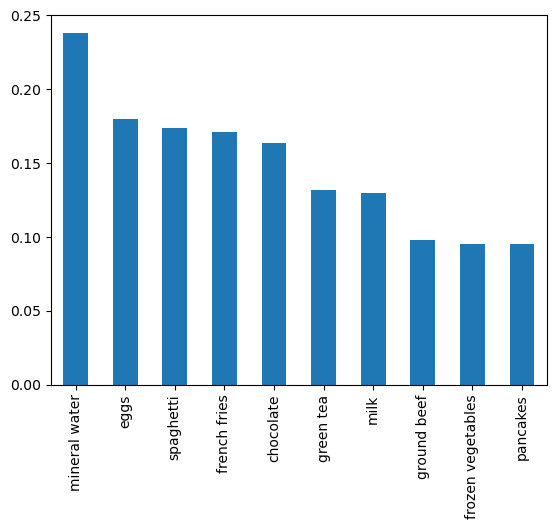

In [51]:
dataset.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar') # Frequency

In [60]:
results_df.sort_values('Lift', ascending=False)

,Item Set,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,"(chicken, light cream)","(light cream,)","(chicken,)",0.004533,0.290598,4.843951
2,"(escalope, pasta)","(pasta,)","(escalope,)",0.005866,0.372881,4.700812
6,"(pasta, shrimp)","(pasta,)","(shrimp,)",0.005066,0.322034,4.506672
5,"(olive oil, whole wheat pasta)","(whole wheat pasta,)","(olive oil,)",0.007999,0.271493,4.122410
4,"(tomato sauce, ground beef)","(tomato sauce,)","(ground beef,)",0.005333,0.377358,3.840659
1,"(escalope, mushroom cream sauce)","(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790833
3,"(herb & pepper, ground beef)","(herb & pepper,)","(ground beef,)",0.015998,0.323450,3.291994
